In [15]:
# the bare minimum
import matplotlib.pyplot as plt
import geopandas as gpd

# more advanced
import pyogrio as ogr
from sklearn.cluster import KMeans
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap, apply_continuous_cmap
from palettable.colorbrewer.sequential import PuRd_9
from matplotlib.colors import LogNorm

import pydeck as pdk

# load Green Infrastructure Data


In [16]:
Green_Infra = ogr.read_dataframe("../Assignments/Data/DEP Green Infrastructure/geo_export_3298f6ed-a61a-4d9f-a900-907faeaebf16.shp")

In [47]:
water = gpd.read_file("waterpoints.geojson")
water.head(3)

,assembly_d,asset_area,asset_id,asset_leng,asset_type,asset_widt,asset_x_co,asset_y_co,bbl,borough,...,row_onsite,secondary_,sewer_type,status,status_gro,tree_commo,tree_latin,NYC_Water_Cluster,color,geometry
0,32.0,85.0,94002.0,17.0,ROWB,5.0,1.036475e+06,191223.22700,4.095890e+09,Queens,...,ROW,0.000000e+00,Combined,Constructed (Full Maintenance),Constructed,Chinese Fringetree,Chionanthus retusus,1,#00ff00,POINT (-73.81168 40.69139)
1,32.0,45.5,94012.0,13.0,ROWGS,3.5,1.036305e+06,191586.59230,4.095020e+09,Queens,...,ROW,4.095020e+09,Combined,Constructed (Full Maintenance),Constructed,N/A,No Tree,1,#00ff00,POINT (-73.81229 40.69238)
2,32.0,70.0,94017.0,20.0,ROWGS,3.5,1.036319e+06,191856.45894,4.095030e+09,Queens,...,ROW,0.000000e+00,Combined,Constructed (Full Maintenance),Constructed,N/A,No Tree,1,#00ff00,POINT (-73.81223 40.69313)


# Basic exploration


In [17]:
Green_Infra.head()

,assembly_d,asset_area,asset_id,asset_leng,asset_type,asset_widt,asset_x_co,asset_y_co,bbl,borough,...,program_ar,project_na,row_onsite,secondary_,sewer_type,status,status_gro,tree_commo,tree_latin,geometry
0,32.0,85.0,94002.0,17.0,ROWB,5.0,1.036475e+06,191223.22700,4.095890e+09,Queens,...,Right of Way (ROW),DDC JAM-003 Phase 2,ROW,0.000000e+00,Combined,Constructed (Full Maintenance),Constructed,Chinese Fringetree,Chionanthus retusus,POINT (-73.81168 40.69139)
1,32.0,45.5,94012.0,13.0,ROWGS,3.5,1.036305e+06,191586.59230,4.095020e+09,Queens,...,Right of Way (ROW),DDC JAM-003 Phase 2,ROW,4.095020e+09,Combined,Constructed (Full Maintenance),Constructed,N/A,No Tree,POINT (-73.81229 40.69238)
2,32.0,70.0,94017.0,20.0,ROWGS,3.5,1.036319e+06,191856.45894,4.095030e+09,Queens,...,Right of Way (ROW),DDC JAM-003 Phase 2,ROW,0.000000e+00,Combined,Constructed (Full Maintenance),Constructed,N/A,No Tree,POINT (-73.81223 40.69313)
3,32.0,70.0,94019.0,20.0,ROWGS,3.5,1.036368e+06,191874.29620,4.095030e+09,Queens,...,Right of Way (ROW),DDC JAM-003 Phase 2,ROW,0.000000e+00,Combined,Constructed (Full Maintenance),Constructed,N/A,No Tree,POINT (-73.81206 40.69317)
4,32.0,52.0,94021.0,13.0,ROWB,4.0,1.036079e+06,191735.02499,4.095020e+09,Queens,...,Right of Way (ROW),DDC JAM-003 Phase 2,ROW,0.000000e+00,Combined,Constructed (Full Maintenance),Constructed,Pin Oak,Quercus palustris,POINT (-73.81310 40.69279)


In [18]:
Green_Infra.columns

Index(['assembly_d', 'asset_area', 'asset_id', 'asset_leng', 'asset_type',
       'asset_widt', 'asset_x_co', 'asset_y_co', 'bbl', 'borough',
       'city_counc', 'community_', 'construc_1', 'constructi', 'dep_cont_1',
       'dep_contra', 'gi_feature', 'gi_id', 'nyc_waters', 'outfall',
       'program_ar', 'project_na', 'row_onsite', 'secondary_', 'sewer_type',
       'status', 'status_gro', 'tree_commo', 'tree_latin', 'geometry'],
      dtype='object')

There is a list of data describing green infrastructure initiatives, Green infrastructure (GI) collects stormwater from streets, sidewalks, and other hard surfaces before it can enter the sewer system or cause local flooding. The GI practice data. 
There are asset and bbl, where asset refers to introducing water into the sewer system, and bbl is located above the stormwater collection area.

In [19]:
Green_Infra.dtypes

assembly_d     float64
asset_area     float64
asset_id       float64
asset_leng     float64
asset_type      object
asset_widt     float64
asset_x_co     float64
asset_y_co     float64
bbl            float64
borough         object
city_counc     float64
community_     float64
construc_1      object
constructi      object
dep_cont_1      object
dep_contra      object
gi_feature      object
gi_id           object
nyc_waters      object
outfall         object
program_ar      object
project_na      object
row_onsite      object
secondary_     float64
sewer_type      object
status          object
status_gro      object
tree_commo      object
tree_latin      object
geometry      geometry
dtype: object

There is quite different type of data. We can see the a lot of float data and some object data(like borough and sewer types)

## categorical column


In [20]:
Green_Infra.nyc_waters.value_counts()

nyc_waters
Jamaica Bay and Tributaries    6596
Flushing Creek                 2179
East River / Open Waters       2004
Newtown Creek                  1579
Flushing Bay                    791
Bronx River                     441
Westchester Creek               224
Hutchinson River                194
Gowanus Canal                   124
Coney Island Creek               49
Alley Creek                       9
Name: count, dtype: int64

This list decribes all the water ways and tributaries to which the drained excess water would leave the city. It also lists the number of drainages that each NYC water source would recieve.

In [21]:
Green_Infra.groupby(["borough","nyc_waters"]).asset_area.sum()

borough        nyc_waters                 
Bronx          Bronx River                     266832.95
               East River / Open Waters        380241.39
               Hutchinson River                169015.39
               Westchester Creek                45312.17
Brooklyn       Coney Island Creek               29461.00
               East River / Open Waters        484196.50
               Gowanus Canal                   325329.07
               Jamaica Bay and Tributaries     853994.35
               Newtown Creek                   199531.98
Manhattan      East River / Open Waters       1190239.03
Queens         Alley Creek                      16572.00
               Bronx River                        270.00
               East River / Open Waters        367460.22
               Flushing Bay                    148781.02
               Flushing Creek                  470109.87
               Jamaica Bay and Tributaries     541460.00
               Newtown Creek                 

This are Same information with above via boroughs

<Axes: xlabel='borough'>

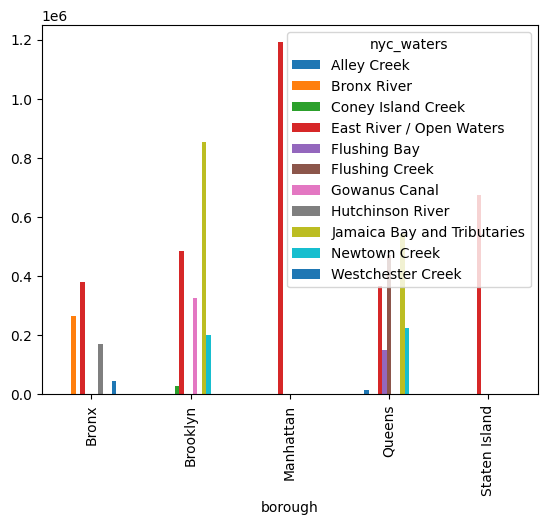

In [22]:
Green_Infra.groupby(["borough","nyc_waters"]).asset_area.sum().unstack().plot.bar()

This is a graph showing how water flows in the drainage system according to boroughs to different water sources.

Text(0.5, 1.0, 'Total asset area by water drainage')

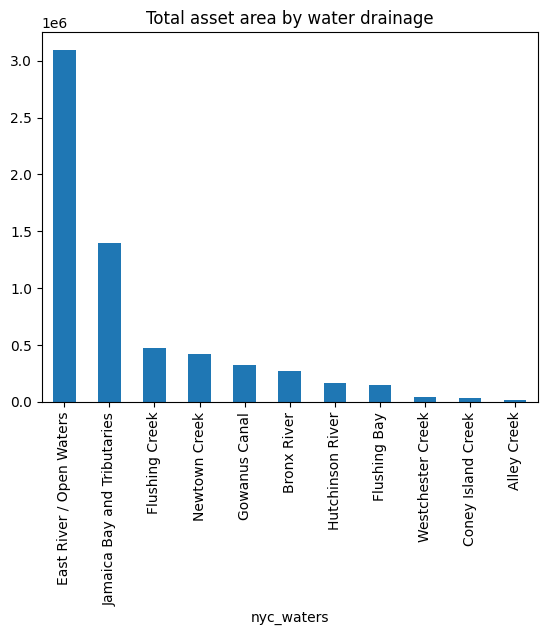

In [23]:
Green_Infra.groupby("nyc_waters").asset_area.sum().sort_values(ascending=False).plot.bar()
plt.title("Total asset area by water drainage")

This is a bar graph depicting the distribution of drainage areas according to water sources.

## numeric column


In [25]:
Green_Infra["asset_area"].describe()

count     14190.000000
mean        450.217921
std        5855.217598
min           1.000000
25%          50.000000
50%          65.000000
75%          93.500000
max      435000.000000
Name: asset_area, dtype: float64

<Axes: ylabel='Frequency'>

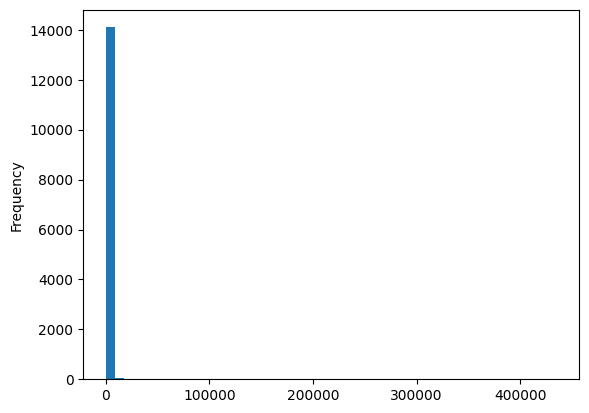

In [26]:
Green_Infra["asset_area"].plot.hist(bins=50)

This frequency described here is asset area but the max value in one of the data sets is much larger than the others that the graph does not properly display other data sets.

<Axes: title={'center': 'asset_area'}, xlabel='borough'>

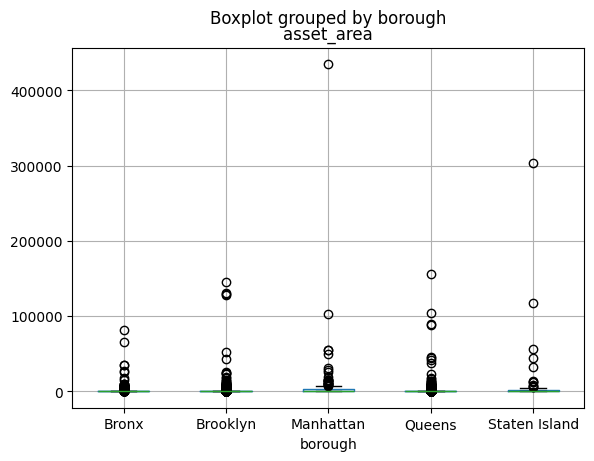

In [27]:
Green_Infra.boxplot(column="asset_area", by="borough")

This is a graph showing how asset areas vary across boroughs, highlighting outliers. There is a data point that is farthest away in Manhattan.

What does this distribution tell us about the number of floors in each borough?


# cluster by number of floors


For clustering, I used bbl and asset_area, because these are only data that have numeric things.
But, When clustered, bbl only tells you where it is and is meaningless.

In [28]:
# get clusters using kmeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(Green_Infra[["bbl", "asset_area"]])

Green_Infra["NYC_Water_Cluster"] = kmeans.predict(Green_Infra[["bbl", "asset_area"]])

In [29]:
Green_Infra.groupby("NYC_Water_Cluster").asset_area.describe().sort_values("max")

,count,mean,std,min,25%,50%,75%,max
NYC_Water_Cluster,,,,,,,,
2,1003.0,736.331256,2981.781163,1.0,58.500,80.42,244.155,65063.63
1,5802.0,342.696493,3906.288786,1.0,52.000,70.00,100.000,145471.00
0,7094.0,252.325960,2989.812811,1.0,50.000,60.00,80.000,156052.00
4,64.0,10555.157969,40972.968694,120.0,589.925,1079.80,2390.750,303481.00
3,227.0,5269.588238,30309.672771,40.0,142.070,582.48,2159.850,435000.00


<Axes: xlabel='bbl', ylabel='asset_area'>

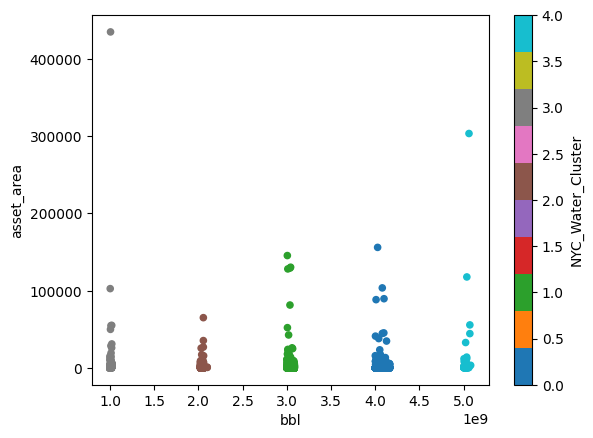

In [30]:
Green_Infra.plot.scatter(x="bbl", y="asset_area", c="NYC_Water_Cluster", cmap="tab10")

<Axes: ylabel='Frequency'>

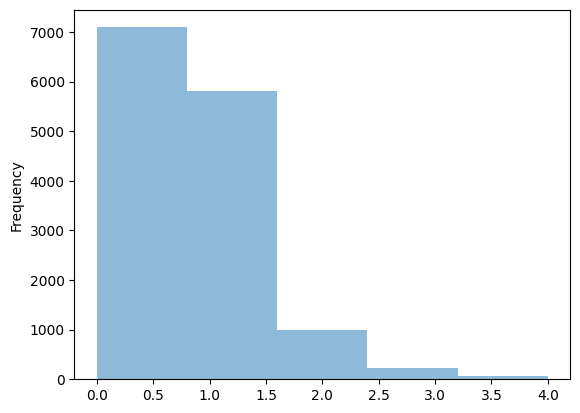

In [31]:
Green_Infra["NYC_Water_Cluster"].plot.hist(bins=5, alpha=0.5)

## static map


Text(0.5, 1.0, 'NYC MapWATER')

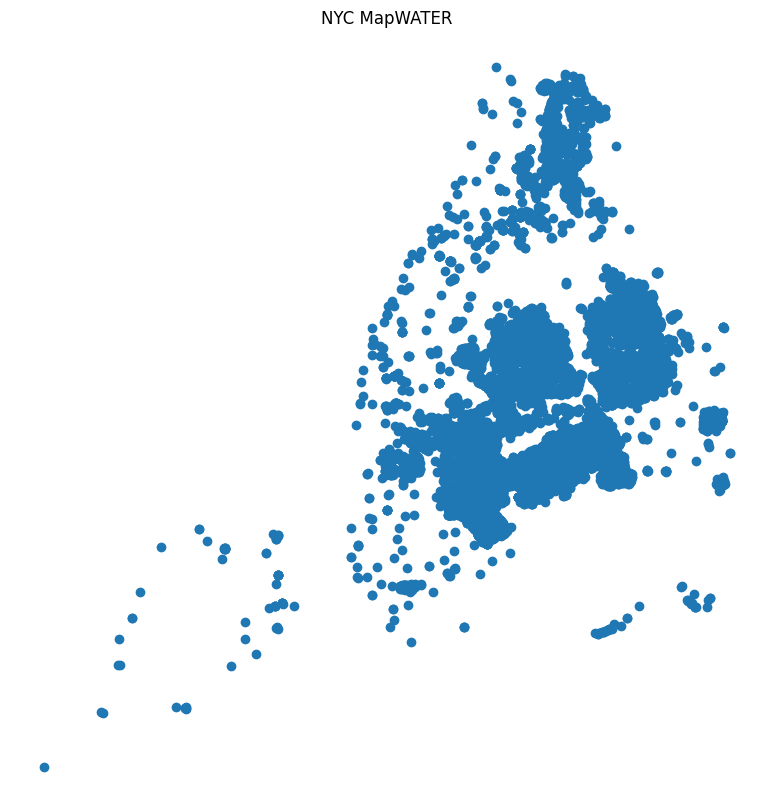

In [32]:
Green_Infra.plot(figsize=(10, 10)).set_axis_off()
plt.title("NYC MapWATER")

Show the density of drainage outflow in the New York.

In [33]:
cmap = {
    "East River / Open Waters": "#ff0000",
    "Jamaica Bay and Tributaries": "#00ff00",
    "Flushing Creek": "#0000ff",
    "Newtown Creek": "#ff00ff",
    "Gowanus Canal": "#00ffff",
    "Bronx River": "#ffff00",
    "Hutchinson River": "#808080",
    "Flushing Bay": "#800000",
    "Westchester Creek": "#008000",
    "Coney Island Creek": "#000080",
    "Alley Creek": "#800080",
    "Unknown": "#000000",
}

In [34]:
Green_Infra.fillna({"nyc_waters": "Unknown"}, inplace=True)

In [35]:
Green_Infra["color"] = Green_Infra["nyc_waters"].map(cmap)

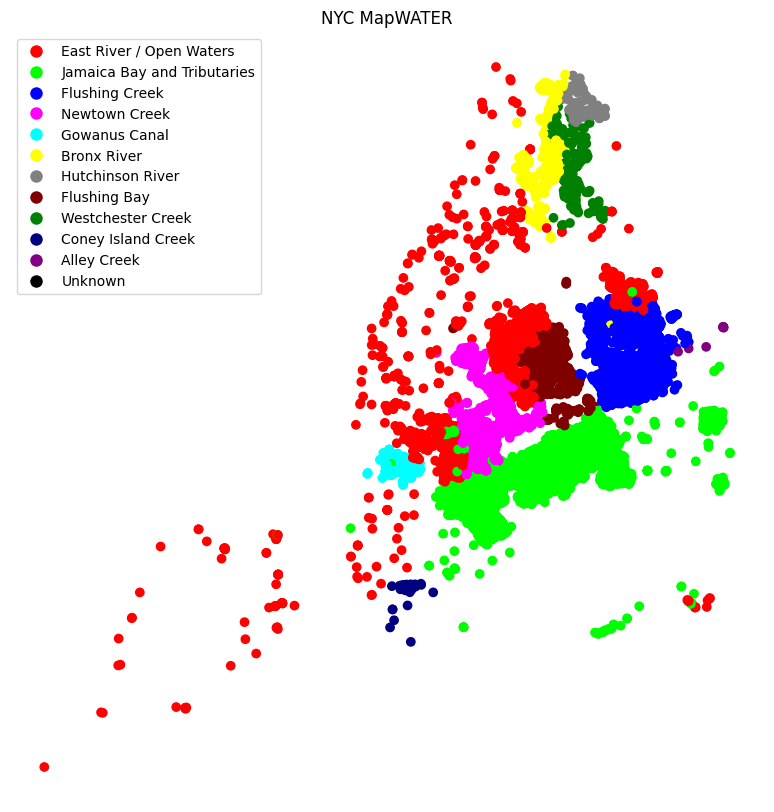

In [36]:
ax = Green_Infra.plot(
    color=Green_Infra["color"],
    figsize=(10, 10),
    legend=True,
).set_axis_off()
plt.title("NYC MapWATER")


# populate legend items based on dict from above
legend_colors = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=c, markersize=10)
    for c in cmap.values()
]
labels = cmap.keys()
plt.legend(legend_colors, labels, loc="upper left")

It is a map showing the location according to the type of drain outflow.

<Axes: >

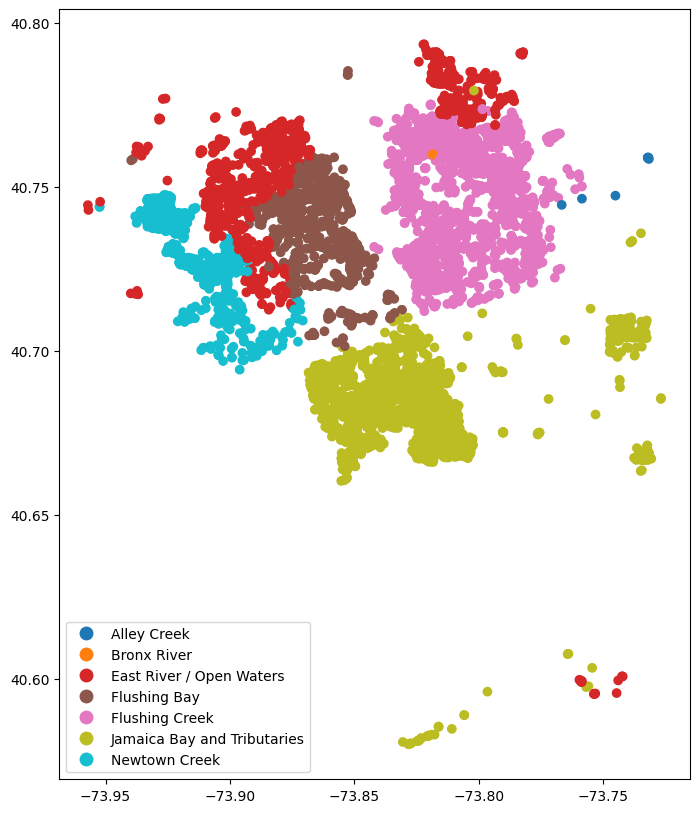

In [37]:
Green_Infra[Green_Infra.borough.eq("Queens")].plot(column="nyc_waters",figsize=(10,10),legend=True)

The Queens area to show the current status according to the type of drought outflow.


In [51]:
neighborhood_gdf = gpd.read_file("../Assignments/Data/2010 Neighborhood Tabulation Areas (NTAs).geojson")

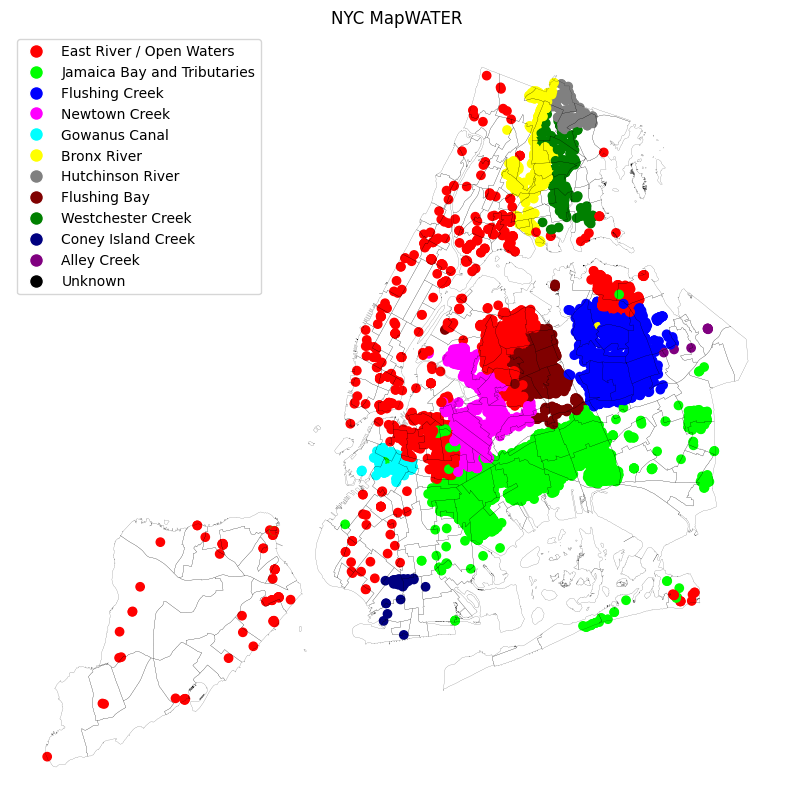

In [52]:
fig, ax = plt.subplots(figsize=(10,10))

Green_Infra.plot(
    
    ax=ax,
    color=Green_Infra["color"],
    legend=True,
)
neighborhood_gdf.plot(ax=ax, color="none", edgecolor="black", linewidth=0.1)

ax.set_axis_off()
plt.title("NYC MapWATER")


# populate legend items based on dict from above
legend_colors = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=c, markersize=10)
    for c in cmap.values()
]
labels = cmap.keys()
plt.legend(legend_colors, labels, loc="upper left")

plt.show()

It is a map showing the location according to the type of drain outflow.
Add background map for making the area well distinguished.

In [55]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Assuming water and neighborhood_gdf are already defined
# water = gpd.read_file('path_to_water_shapefile')
# neighborhood_gdf = gpd.read_file('path_to_neighborhood_shapefile')

# Perform a spatial join to assign each water point to a neighborhood
water_in_neighborhoods = gpd.sjoin(water, neighborhood_gdf, how='left', op='within')

# Group by the neighborhood identifier (e.g., neighborhood name or ID)
grouped = water_in_neighborhoods.groupby('ntaname')

# Aggregate the counts and determine the most dominant 'nyc_waters' value
result = grouped['nyc_waters'].agg([
    ('total_points', 'count'),
    ('most_dominant_nyc_waters', lambda x: x.value_counts().idxmax())
]).reset_index()

# Merge the result back with neighborhood_gdf
neighborhood_with_counts = neighborhood_gdf.merge(result, on='ntaname', how='left')

c:\Users\user\anaconda3\envs\CDP\Lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


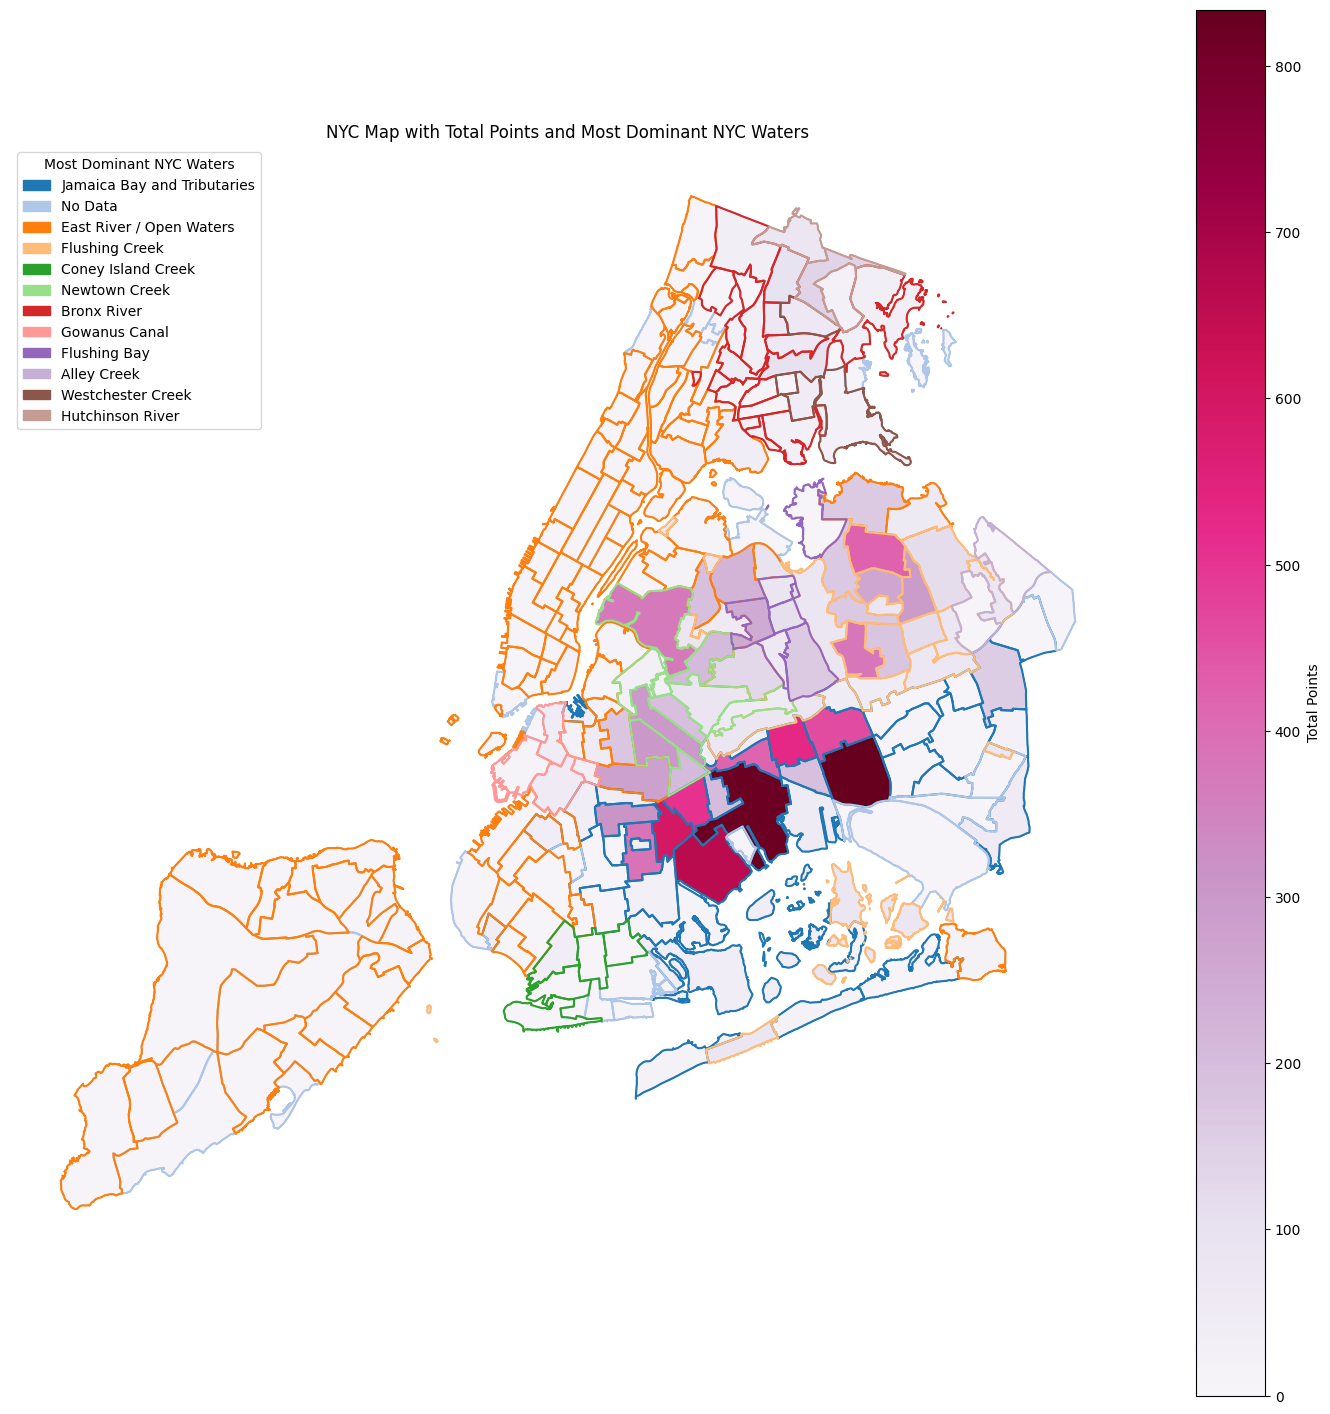

In [54]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Assuming neighborhood_with_counts is already defined

# Fill NaN values in 'total_points' with 0
neighborhood_with_counts['total_points'] = neighborhood_with_counts['total_points'].fillna(0)

# Handle NaN values in 'most_dominant_nyc_waters' if necessary
# For example, fill with a placeholder string or skip NaN values
neighborhood_with_counts['most_dominant_nyc_waters'] = neighborhood_with_counts['most_dominant_nyc_waters'].fillna('No Data')

# Create a colormap for the total_points choropleth
cmap = plt.cm.PuRd
norm = plt.Normalize(vmin=neighborhood_with_counts['total_points'].min(), vmax=neighborhood_with_counts['total_points'].max())

# Create a color mapping for the 'most_dominant_nyc_waters' values
unique_nyc_waters = neighborhood_with_counts['most_dominant_nyc_waters'].unique()
colors = plt.cm.tab20.colors[:len(unique_nyc_waters)]
color_dict = dict(zip(unique_nyc_waters, colors))

# Plot the neighborhoods with a choropleth based on 'total_points'
fig, ax = plt.subplots(figsize=(18, 18))
neighborhood_with_counts.plot(column='total_points', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.25')

# Overlay the neighborhoods with different colors based on 'most_dominant_nyc_waters'
for key, value in color_dict.items():
    neighborhood_with_counts[neighborhood_with_counts['most_dominant_nyc_waters'] == key].boundary.plot(ax=ax, linewidth=1.5, edgecolor=value)

# Add a colorbar for the choropleth
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Total Points')

# Create custom legends for 'most_dominant_nyc_waters'
patches = [mpatches.Patch(color=color_dict[dom], label=dom) for dom in color_dict]
plt.legend(handles=patches, loc='upper left', title='Most Dominant NYC Waters')

# Turn off the axis
ax.set_axis_off()

# Add title
plt.title("NYC Map with Total Points and Most Dominant NYC Waters")

# Show plot
plt.show()


I can also determine how much flood risk there is in the area by how much NYC Waters are gathered. The gradation bar on the right suggests that the darker the color, the more NYC Waters infrastructure is gathered there, indicating that there is a high flood possibility. Jamaica Bay, for example, has the darkest areas prominently distributed.